In [169]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
df = pd.read_csv('Housing.csv')

In [171]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [173]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## EDA

Text(0, 0.5, 'Frequency')

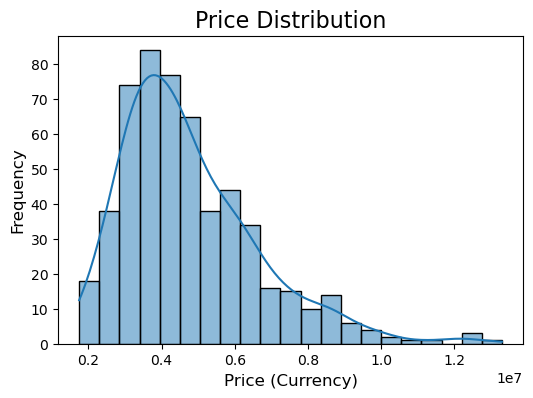

In [174]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)

# Customize plot
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price (Currency)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

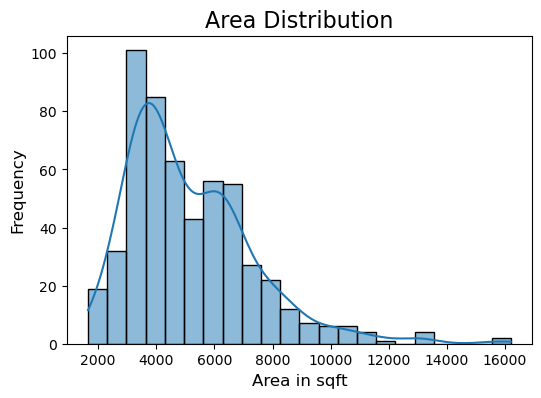

In [175]:
plt.figure(figsize=(6, 4))
sns.histplot(df['area'], kde=True)

# Customize plot
plt.title('Area Distribution', fontsize=16)
plt.xlabel('Area in sqft', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0.5, 1.0, 'Bedrooms')

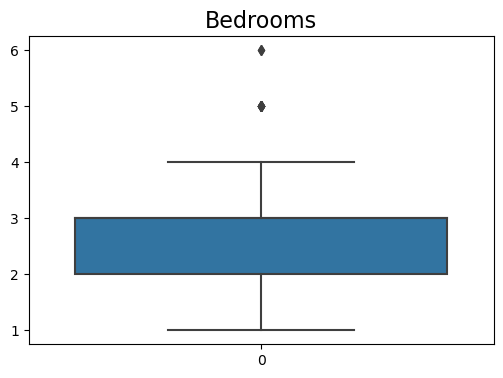

In [176]:
plt.figure(figsize=(6, 4))
sns.boxplot(df.bedrooms)
plt.title('Bedrooms', fontsize=16)

Text(0.5, 1.0, 'Bathrooms')

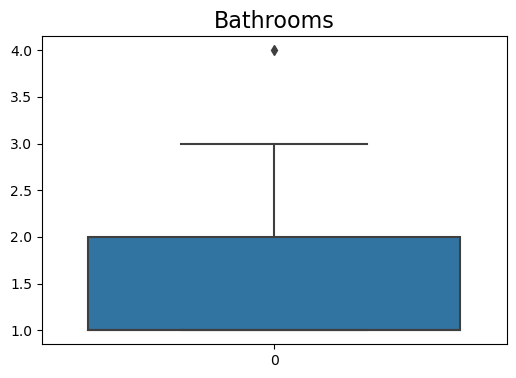

In [177]:
plt.figure(figsize=(6, 4))
sns.boxplot(df.bathrooms)
plt.title('Bathrooms', fontsize=16)

Text(0.5, 1.0, 'Stories')

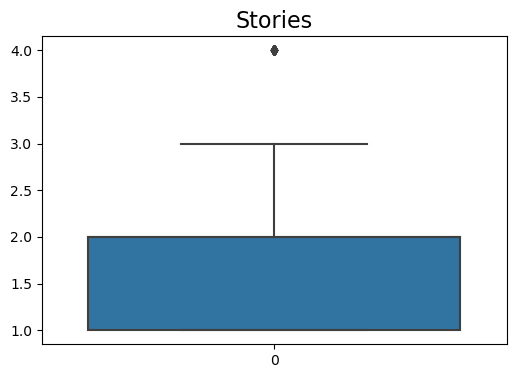

In [178]:
plt.figure(figsize=(6, 4))
sns.boxplot(df.stories)
plt.title('Stories', fontsize=16)

Text(0.5, 1.0, 'Parking')

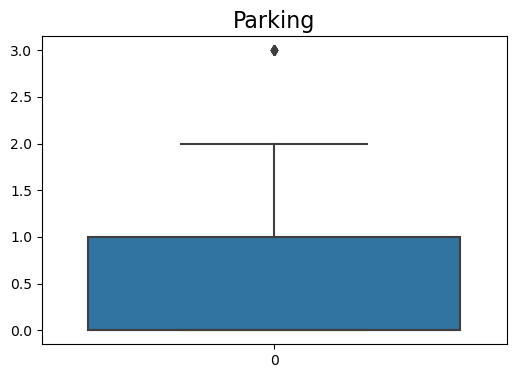

In [179]:
plt.figure(figsize=(6, 4))
sns.boxplot(df.parking)
plt.title('Parking', fontsize=16)

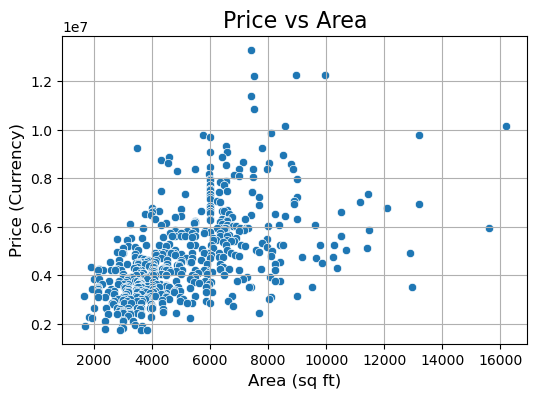

In [180]:
# scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='price', data=df)

plt.title('Price vs Area', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price (Currency)', fontsize=12)
plt.grid(True)

In [181]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


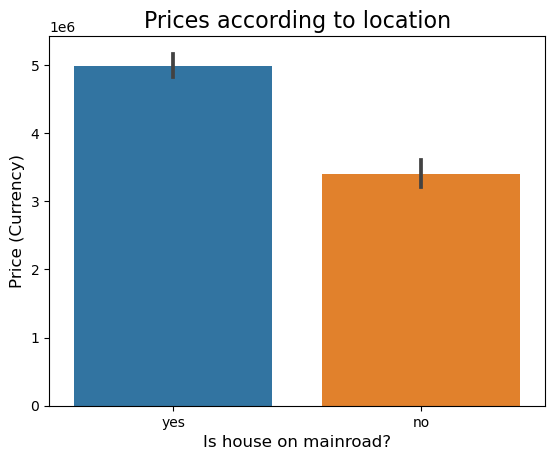

In [182]:
sns.barplot(x='mainroad',y='price',data=df)
plt.title('Prices according to location', fontsize=16)
plt.xlabel('Is house on mainroad?', fontsize=12)
plt.ylabel('Price (Currency)', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Prices according to furnishing status')

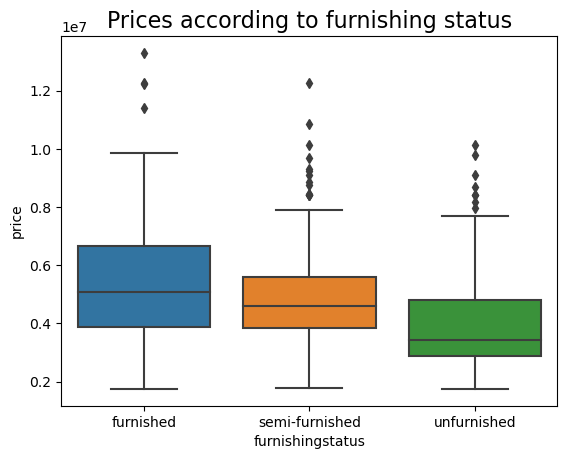

In [183]:
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.title('Prices according to furnishing status', fontsize=16)

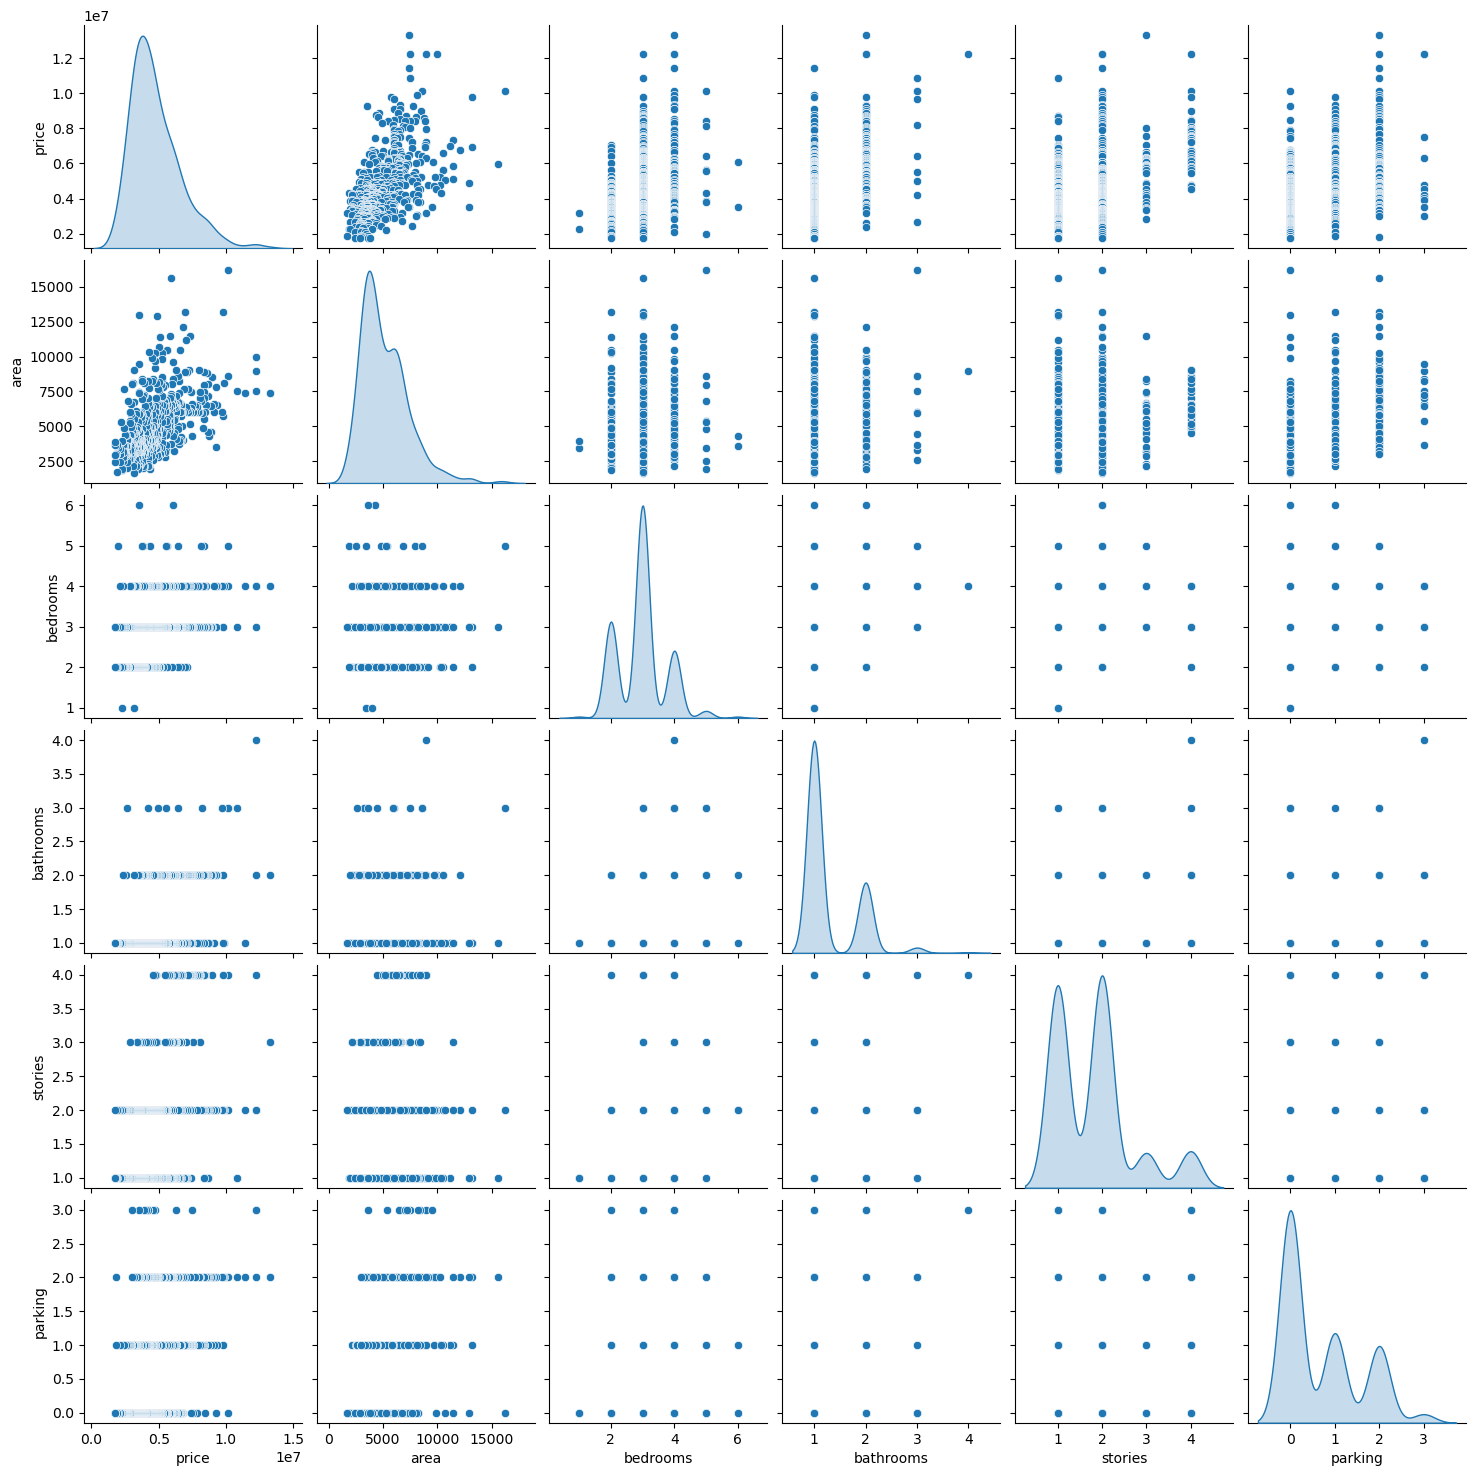

In [184]:
sns.pairplot(df, diag_kind='kde')

### One hot encoding to categorical features

In [185]:
s = df.dtypes == 'object'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
No. of. categorical features:  7


In [186]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[object_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, encoded_df], axis=1)

### Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df_final.columns)
scaled_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,...,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315,...,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,...,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315,...,1.361397,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083,...,1.361397,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429


### Split data into train and test

In [199]:
# split before feature engineering to avoid data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_final,df_final['price'],test_size=0.2,random_state=0)

### Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_LR))

3.2755960187407166e-17


### SVM

In [205]:
from sklearn.svm import SVR

model_SVR = SVR()
model_SVR.fit(X_train, y_train)

y_pred_SVR = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_SVR))

0.2710026406826236


### Random Forest

In [206]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)

y_pred_RFR = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_RFR))

0.0027127580174800604


### Adaboost 

In [207]:
from sklearn.ensemble import AdaBoostRegressor

model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train,y_train)

y_pred_ABR = model_ABR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_pred_ABR))

0.030852809802029167


#### Clearly, Linear Regressor model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 3.27e-17 approx.